
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </font>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Blue' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Blue' size = 4 >FIRST PART</font>

<font color = 'Orange' size = 3 > Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>
</ul>
<font color = 'Blue' size = 4 >SECOND PART</font>
<ul>
<font color='Orange'>
Cluster the tweets based on their embeddings using one of the clustering algorithms:

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>

</ul>

</font>

## Imports and data processing

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

In [7]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')

In [8]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [10]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [11]:
sample_submission = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

In [12]:
sample_submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [13]:
test = pd.merge(test,sample_submission,on='id')

In [14]:
test.drop(['keyword','location'],axis=1,inplace=True)

In [15]:
test

,id,text,target
0,0,Just happened a terrible car crash,0
1,2,"Heard about #earthquake is different cities, s...",0
2,3,"there is a forest fire at spot pond, geese are...",0
3,9,Apocalypse lighting. #Spokane #wildfires,0
4,11,Typhoon Soudelor kills 28 in China and Taiwan,0
...,...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,Storm in RI worse than last hurricane. My city...,0
3260,10868,Green Line derailment in Chicago http://t.co/U...,0
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...,0


In [16]:
train.drop(['keyword','location'],axis=1,inplace=True)

In [17]:
train.rename(columns = {'target':'label'}, inplace = True)

In [18]:
test.rename(columns = {'target':'label'}, inplace = True)

In [19]:
train

,id,text,label
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [20]:
test

,id,text,label
0,0,Just happened a terrible car crash,0
1,2,"Heard about #earthquake is different cities, s...",0
2,3,"there is a forest fire at spot pond, geese are...",0
3,9,Apocalypse lighting. #Spokane #wildfires,0
4,11,Typhoon Soudelor kills 28 in China and Taiwan,0
...,...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,Storm in RI worse than last hurricane. My city...,0
3260,10868,Green Line derailment in Chicago http://t.co/U...,0
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...,0


In [21]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.3 MB/s eta 0:00:00


In [18]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


## Pretrained model for NLP
Loss function
Optimizer function for compiling
F1 score for the prediction of the test part (this is the metric for rating the models)

*   Pretrained model: bert-base-uncased
*   Loss function: 
*   Optimizer function for compiling: AdamW 
*   F1 score: 0.75



In [19]:
from datasets import load_dataset

In [20]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

In [21]:
train.to_csv('train.csv',index=False)

In [22]:
test.to_csv('test.csv',index=False)

In [23]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [24]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased',num_labels =2)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [25]:
dataset = load_dataset("csv", data_files={"train": "train.csv", "test": "test.csv"})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-9dccf58e583114c8/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [26]:
encoded_dataset = dataset.map(lambda t: tokenizer(t['text'],  truncation=True), batched=True,load_from_cache_file=False)

  0%|          | 0/8 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

In [27]:
encoded_dataset['test']

Dataset({
    features: ['id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3263
})

In [28]:
from transformers import TrainingArguments, Trainer

In [29]:
arg = TrainingArguments(
    "classification",
    learning_rate=5e-5,
    num_train_epochs=3,
    per_device_eval_batch_size=12,
    per_device_train_batch_size=12,
    seed=19
)

In [30]:
trainer = Trainer(
    model=model,
    args=arg,
    tokenizer=tokenizer,
    train_dataset=encoded_dataset['train'],
    eval_dataset=encoded_dataset['test']
)

In [31]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 7613
  Num Epochs = 3
  Instantaneous batch size per device = 12
  Total train batch size (w. parallel, distributed & accumulation) = 12
  Gradient Accumulation steps = 1
  Total optimization steps = 1905
  Number of trainable parameters = 109483778
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using

Step,Training Loss
500,0.464500
1000,0.350600
1500,0.265000


Saving model checkpoint to classification/checkpoint-500
Configuration saved in classification/checkpoint-500/config.json
Model weights saved in classification/checkpoint-500/pytorch_model.bin
tokenizer config file saved in classification/checkpoint-500/tokenizer_config.json
Special tokens file saved in classification/checkpoint-500/special_tokens_map.json
Saving model checkpoint to classification/checkpoint-1000
Configuration saved in classification/checkpoint-1000/config.json
Model weights saved in classification/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in classification/checkpoint-1000/tokenizer_config.json
Special tokens file saved in classification/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to classification/checkpoint-1500
Configuration saved in classification/checkpoint-1500/config.json
Model weights saved in classification/checkpoint-1500/pytorch_model.bin
tokenizer config file saved in classification/checkpoint-1500/tokenizer_config.js

TrainOutput(global_step=1905, training_loss=0.32892628266742535, metrics={'train_runtime': 298.4621, 'train_samples_per_second': 76.522, 'train_steps_per_second': 6.383, 'total_flos': 617868521856420.0, 'train_loss': 0.32892628266742535, 'epoch': 3.0})

In [32]:
y_pred = trainer.predict(encoded_dataset['test'])

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text, id. If text, id are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3263
  Batch size = 12


In [33]:
y_pred = y_pred.predictions

In [34]:
import numpy as np

In [35]:
y_pred = [np.argmax(y_pred[i]) for i in range(0,len(y_pred))]

In [36]:
from sklearn.metrics import classification_report,f1_score

In [39]:
f1_score(test['label'],y_pred)

0.0

In [40]:
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.60      3263
   macro avg       0.50      0.30      0.38      3263
weighted avg       1.00      0.60      0.75      3263



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Trying XGBoost for and TFIDVectorizer

In [51]:
train.drop(['id'],axis=1,inplace=True)

In [56]:
train

,text,label
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [53]:
test.drop(['id'],axis=1,inplace=True)

In [ ]:
test

In [57]:
from xgboost import XGBClassifier

In [61]:
#Note: Undersampling is a technique used to balance uneven datasets by keeping all of the data from the minority class and decreasing the size of data of the majority class.
from imblearn.pipeline import make_pipeline as make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

model = make_pipeline(TfidfVectorizer(),
                      XGBClassifier(max_depth=15, min_child_weight=1, n_estimators=200, n_jobs=-1, verbose=1, learning_rate=0.16))
model.fit(train.text, train.label)

y_pred = model.predict(test.text)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test.label, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.66      3263
   macro avg       0.50      0.33      0.40      3263
weighted avg       1.00      0.66      0.80      3263



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBoost performs better and faster for classification, despite of the lower quality of the vectorization.
The small dataset and classification problem makes xgboost better for this kind of tasks

## Clustering

In [22]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [23]:
train

,id,text,label
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [24]:
train.drop(['id'],axis=1,inplace=True)

In [25]:
train

,text,label
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [26]:
logging.set_verbosity(logging.ERROR)
message_embeddings = embed(train.text.values)

In [31]:
from sklearn.decomposition import PCA
import numpy as np

data = message_embeddings
pca = PCA(2)
 
df_new = pca.fit_transform(data)

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(df_new, n_neighbors=10, include_self=False)

In [39]:
model = AgglomerativeClustering(n_clusters=2, connectivity=connectivity, linkage='ward').fit(df_new) 

In [40]:
clusters = model.labels_.tolist()
model.labels_ 

array([1, 0, 0, ..., 0, 0, 0])

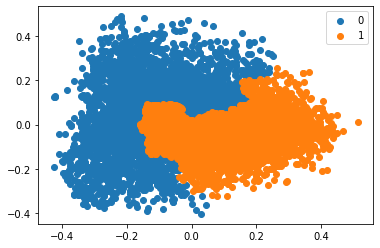

In [41]:
label = model.fit_predict(df_new)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()